<a href="https://colab.research.google.com/github/Abdelhak-mekaoui/House-Prices---Advanced-Regression-Techniques/blob/Notebook/Copy_of_random_forest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices - Advanced Regression Techniques

## Importing the libraries

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [133]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [134]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [135]:
for column in train_data.columns :
  if train_data[column].dtype == 'object' :
    print(f"{column} : {train_data[column].nunique()}")

MSZoning : 5
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
FireplaceQu : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
PoolQC : 3
Fence : 4
MiscFeature : 4
SaleType : 9
SaleCondition : 6


# Dealing with missing values

In [136]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

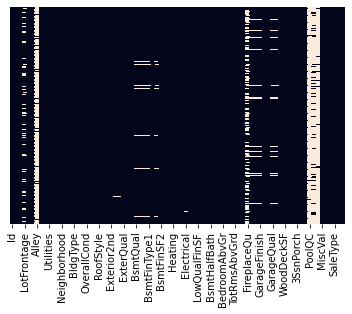

In [137]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [138]:
missing_values = train_data['GarageQual'].isnull().sum()
print(missing_values)

81


**Droping columns with large number of missing values**

In [139]:
columns_to_drop = ['Id','PoolQC','FireplaceQu','Alley','LotFrontage']

In [140]:
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

In [141]:
train_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [142]:
categorical_columns=[]
numerical_columns=[]
categorical_columns_indexes=[]
numerical_columns_indexes=[]
for i,column in enumerate(train_data.columns) :
  if train_data[column].dtype == 'object' :
    categorical_columns.append(column)
    categorical_columns_indexes.append(i)
  else:
    numerical_columns.append(column)
    numerical_columns_indexes.append(i)

print(categorical_columns)
print(numerical_columns)
print(categorical_columns_indexes)
print(numerical_columns_indexes)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',

**Fill in the missing values**

In [143]:
X=train_data.iloc[:,:-1].values
y=train_data.iloc[:,-1].values
X_test=test_data.iloc[:,:].values


In [144]:
print(X.shape)
print(y.shape)
print(X_test.shape)

(1460, 75)
(1460,)
(1459, 75)


In [145]:
print(X[:5,:])
print(y)

[[60 'RL' 8450 'Pave' 'Reg' 'Lvl' 'AllPub' 'Inside' 'Gtl' 'CollgCr'
  'Norm' 'Norm' '1Fam' '2Story' 7 5 2003 2003 'Gable' 'CompShg' 'VinylSd'
  'VinylSd' 'BrkFace' 196.0 'Gd' 'TA' 'PConc' 'Gd' 'TA' 'No' 'GLQ' 706
  'Unf' 0 150 856 'GasA' 'Ex' 'Y' 'SBrkr' 856 854 0 1710 1 0 2 1 3 1 'Gd'
  8 'Typ' 0 'Attchd' 2003.0 'RFn' 2 548 'TA' 'TA' 'Y' 0 61 0 0 0 0 nan
  nan 0 2 2008 'WD' 'Normal']
 [20 'RL' 9600 'Pave' 'Reg' 'Lvl' 'AllPub' 'FR2' 'Gtl' 'Veenker' 'Feedr'
  'Norm' '1Fam' '1Story' 6 8 1976 1976 'Gable' 'CompShg' 'MetalSd'
  'MetalSd' 'None' 0.0 'TA' 'TA' 'CBlock' 'Gd' 'TA' 'Gd' 'ALQ' 978 'Unf'
  0 284 1262 'GasA' 'Ex' 'Y' 'SBrkr' 1262 0 0 1262 0 1 2 0 3 1 'TA' 6
  'Typ' 1 'Attchd' 1976.0 'RFn' 2 460 'TA' 'TA' 'Y' 298 0 0 0 0 0 nan nan
  0 5 2007 'WD' 'Normal']
 [60 'RL' 11250 'Pave' 'IR1' 'Lvl' 'AllPub' 'Inside' 'Gtl' 'CollgCr'
  'Norm' 'Norm' '1Fam' '2Story' 7 5 2001 2002 'Gable' 'CompShg' 'VinylSd'
  'VinylSd' 'BrkFace' 162.0 'Gd' 'TA' 'PConc' 'Gd' 'TA' 'Mn' 'GLQ' 486
  'Unf' 0 434 9

In [146]:
from sklearn.impute import SimpleImputer
si1=SimpleImputer(missing_values=np.nan,strategy='mean')
si2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [147]:
numerical_columns_indexes.remove(75)

In [148]:
X[:,numerical_columns_indexes] = si1.fit_transform(X[:,numerical_columns_indexes])
X[:,categorical_columns_indexes] = si2.fit_transform(X[:,categorical_columns_indexes])
X_test[:,numerical_columns_indexes] = si1.fit_transform(X_test[:,numerical_columns_indexes])
X_test[:,categorical_columns_indexes] = si2.fit_transform(X_test[:,categorical_columns_indexes])

# OneHotEncoding & FeatureScaling



In [149]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
#Encoding and scaling the input variable
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(handle_unknown='ignore', sparse=False),categorical_columns_indexes)
                                     ,('scaler',StandardScaler(),numerical_columns_indexes)]
                       ,remainder='passthrough')
ct.fit(np.concatenate((X,X_test)))
X = np.array(ct.transform(X))
X_test = np.array(ct.transform(X_test))

In [150]:
print(X.shape)

(1460, 277)


In [151]:
print(X_test.shape)

(1459, 277)


# Spliting the dataset into Train set and cross validation set

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training Regression models on the training set

**Random Forest**

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

max_depth = range(5,20)
lt_1=[]
lcv_1=[]
R2_1=[]
min=5

for md in max_depth:
  print(f"=========================={md}===================================")
  regressor1 = RandomForestRegressor(n_estimators = 20, random_state = 0,max_depth=md)
  regressor1.fit(X_train, y_train)
  y_pred_train_1 = regressor1.predict(X_train)
  y_pred_cv_1 = regressor1.predict(X_cv)
  J_train_1 = mean_squared_error(y_train,y_pred_train_1)
  J_cv_1 = mean_squared_error(y_cv,y_pred_cv_1)
  lt_1.append(J_train_1)
  lcv_1.append(J_cv_1)
  if md!=5 and J_cv_1<lcv_1[-2]:
    min = md
  print( f"J_train = {J_train_1}  J_cv = {J_cv_1}\ndifference : {J_cv_1-J_train_1}")
  #R2_1.append(r2_score(y_cv, y_pred_cv_1)
  r2_score(y_cv,y_pred_cv_1)


==========================5===================================
J_train = 560889718.6193297  J_cv = 1410694209.623117
difference : 849804491.0037873
==========================6===================================
J_train = 391956815.0289122  J_cv = 1368093330.3523905
difference : 976136515.3234783
==========================7===================================
J_train = 296530236.4166436  J_cv = 1117770235.4656606
difference : 821239999.049017
==========================8===================================
J_train = 226768392.37577283  J_cv = 1096855761.7209325
difference : 870087369.3451596
==========================9===================================
J_train = 189586444.43516806  J_cv = 1108521360.2764394
difference : 918934915.8412714
==========================10===================================
J_train = 169236701.50443476  J_cv = 1157594448.952775
difference : 988357747.4483402
==========================11===================================
J_train = 151908829.24137416  J_cv = 1155

16


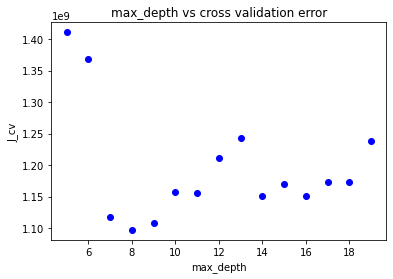

In [154]:
print(min)
plt.scatter(max_depth,lcv_1,color='blue')
plt.title('max_depth vs cross validation error')
plt.xlabel('max_depth')
plt.ylabel('J_cv')
plt.show()

In [155]:
min_md=9

In [156]:
min_samples_split = range(2,15)
lt_2=[]
lcv_2=[]
R2_2=[]
min_sp=2

for msp in min_samples_split:
  print(f"=========================={msp}===================================")
  regressor1 = RandomForestRegressor(n_estimators = 20, random_state = 0,min_samples_split=msp)
  regressor1.fit(X_train, y_train)
  y_pred_train_1 = regressor1.predict(X_train)
  y_pred_cv_1 = regressor1.predict(X_cv)
  J_train_2 = mean_squared_error(y_train,y_pred_train_1)
  J_cv_2 = mean_squared_error(y_cv,y_pred_cv_1)
  lt_2.append(J_train_2)
  lcv_2.append(J_cv_2)
  if msp!=2 and J_cv_2<lcv_2[-2]:
    min_sp = msp
  print( f"J_train = {J_train_2}  J_cv = {J_cv_2}\ndifference : {J_cv_2-J_train_2}")
  #R2_1.append(r2_score(y_cv, y_pred_cv_1)
  r2_score(y_cv,y_pred_cv_1)

==========================2===================================
J_train = 141876295.50556508  J_cv = 1178986010.054726
difference : 1037109714.5491608
==========================3===================================
J_train = 156723591.60708755  J_cv = 1153182566.3325326
difference : 996458974.725445
==========================4===================================
J_train = 171259167.5177721  J_cv = 1184825145.1059952
difference : 1013565977.5882231
==========================5===================================
J_train = 186074111.16138586  J_cv = 1158361665.9243815
difference : 972287554.7629956
==========================6===================================
J_train = 189597124.03508106  J_cv = 1217619161.1174948
difference : 1028022037.0824138
==========================7===================================
J_train = 211189831.1698173  J_cv = 1170429862.2280757
difference : 959240031.0582584
==========================8===================================
J_train = 223715313.25428107  J_cv = 1

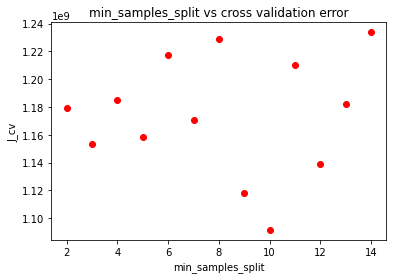

In [157]:
plt.scatter(min_samples_split,lcv_2,color='red')
plt.title('min_samples_split vs cross validation error')
plt.xlabel('min_samples_split')
plt.ylabel('J_cv')
plt.show()


In [158]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0,max_depth=18,min_samples_split=13)
regressor.fit(X_train, y_train)
y_pred_train_1 = regressor.predict(X_train)
y_pred_cv_1 = regressor.predict(X_cv)
r2_score(y_cv,y_pred_cv_1)

0.8284632274643003

In [159]:
y_pred = regressor.predict(X_test)

In [160]:
sub=sample_submission[['Id']]
sub["SalePrice"]=y_pred

In [161]:
sub

,Id,SalePrice
0,1461,126149.404651
1,1462,153458.319875
2,1463,183415.204721
3,1464,178723.552206
4,1465,201083.493348
...,...,...
1454,2915,91565.547645
1455,2916,88342.604452
1456,2917,154092.862370
1457,2918,116804.631289
